<a href="https://colab.research.google.com/github/gabrielzj/Final_Project_AI/blob/main/projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2
Alunos: Gabriel Zuin Jarduli 1997440 e Wendel Matheus Lorenzi Ferreira 1997556


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("adult.csv")

Limpeza da base

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.drop(['education.num'], axis=1, inplace=True)

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [ ]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [ ]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

## Limpeza dos dados

In [ ]:
from sklearn.impute import SimpleImputer

#transformando os dados desconhecidos em NaN
df.replace('?', np.nan, inplace=True)

## Substituindo dados NaN para os dados mais frequentes de cada atributo
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[['workclass', 'occupation', 'native.country']] = imp.fit_transform(df[['workclass', 'occupation', 'native.country']])

print(df.isnull().sum())

df.dropna(inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


## Pré-processamento

In [ ]:
#Aplicando get_dummies para os atributos que possuem mais de 2 valores
df = pd.get_dummies(df, columns=['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country'])

In [ ]:
# Transformando dados categóricos
from sklearn.preprocessing import LabelEncoder, StandardScaler

Le = LabelEncoder()

df["sex"] = Le.fit_transform(df["sex"])
df["income"] = Le.fit_transform(df["income"])
df["education"] = Le.fit_transform(df["education"])

std = StandardScaler()

# Normalização dos dados
df_scaled = df.copy()
df_scaled[['age', 'fnlwgt','capital.loss', 'hours.per.week']] = std.fit_transform(df_scaled[['age', 'fnlwgt','capital.loss', 'hours.per.week']])




In [ ]:
df_scaled.head()

,age,fnlwgt,education,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,0.181332,0,0,10.593507,-0.035429,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.183112,-0.539169,0.181332,0,0,10.593507,-1.817204,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.010110,-0.035220,1.214869,0,0,10.593507,-0.035429,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.130359,-0.468215,-1.368974,0,0,9.461864,-0.035429,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.177296,0.709482,1.214869,0,0,9.461864,-0.035429,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   fnlwgt                                     32561 non-null  int64
 2   education                                  32561 non-null  int64
 3   sex                                        32561 non-null  int64
 4   capital.gain                               32561 non-null  int64
 5   capital.loss                               32561 non-null  int64
 6   hours.per.week                             32561 non-null  int64
 7   income                                     32561 non-null  int64
 8   workclass_Federal-gov                      32561 non-null  uint8
 9   workclass_Local-gov                        32561 non-null  uint8
 10  workclass_Never-worked                     325

## Balanceamento das classes

In [ ]:
from sklearn.model_selection import train_test_split

# drop da coluna income, para o treino
X = df_scaled.drop(['income'], axis=1)

y = df_scaled['income']



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #80% pra treino e 20% pra teste

In [ ]:
X_train = pd.DataFrame(std.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(std.transform(X_test), columns = X.columns)

## Decision Tree


Training Score 0.9999616093366094
Testing Score 
 0.8151389528635038


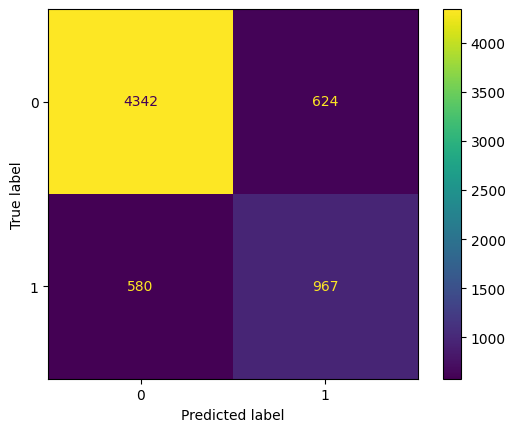

In [ ]:
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_score = clf.score(X_train, y_train)
clf_test = clf.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)

cm = confusion_matrix(y_test,y_pred)
print('Training Score', clf_score)
print('Testing Score \n',clf_test)
ConfusionMatrixDisplay(cm).plot()

## KNN


Training Score 0.8724662162162162
Testing Score 
 0.8238906801781053


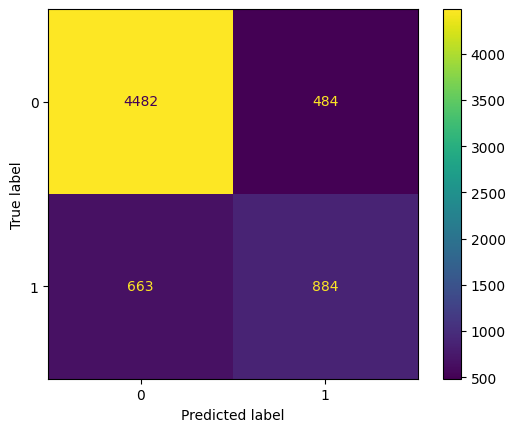

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_train_score = knn.score(X_train,y_train)
knn_test_score = knn.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',knn_train_score)
print('Testing Score \n',knn_test_score)
ConfusionMatrixDisplay(cm).plot()

## Rede Neural

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

income = MLPClassifier(activation='relu', solver='sgd', max_iter=800, tol=0.0001, verbose = True)

income.fit(X_train, y_train)

previsoes = income.predict(X_test)

print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes) * 100.0))

Iteration 1, loss = 0.61293421
Iteration 2, loss = 0.46127384
Iteration 3, loss = 0.41933701
Iteration 4, loss = 0.39751870
Iteration 5, loss = 0.38434998
Iteration 6, loss = 0.37551401
Iteration 7, loss = 0.36934495
Iteration 8, loss = 0.36479402
Iteration 9, loss = 0.36126165
Iteration 10, loss = 0.35843546
Iteration 11, loss = 0.35603192
Iteration 12, loss = 0.35405995
Iteration 13, loss = 0.35232851
Iteration 14, loss = 0.35083755
Iteration 15, loss = 0.34950396
Iteration 16, loss = 0.34825895
Iteration 17, loss = 0.34716542
Iteration 18, loss = 0.34605607
Iteration 19, loss = 0.34509540
Iteration 20, loss = 0.34414379
Iteration 21, loss = 0.34328150
Iteration 22, loss = 0.34241006
Iteration 23, loss = 0.34159616
Iteration 24, loss = 0.34079010
Iteration 25, loss = 0.34002767
Iteration 26, loss = 0.33936888
Iteration 27, loss = 0.33869113
Iteration 28, loss = 0.33806544
Iteration 29, loss = 0.33740984
Iteration 30, loss = 0.33679857
Iteration 31, loss = 0.33627477
Iteration 32, los

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4966
           1       0.71      0.62      0.66      1547

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



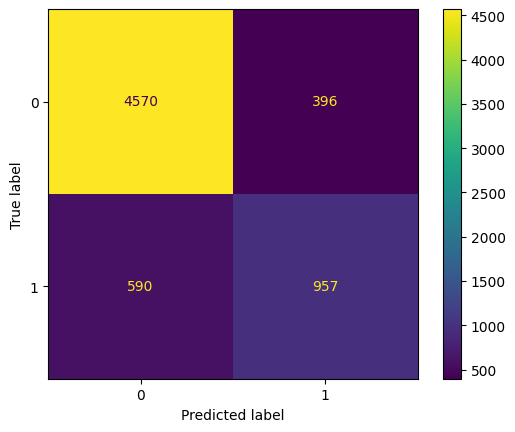

In [ ]:
cm = confusion_matrix(y_test, previsoes)

ConfusionMatrixDisplay(cm).plot()

In [ ]:
previsoes_treino = income.predict(X_train)

previsoes_teste = income.predict(X_test)

print('accuracy_score train: ', accuracy_score(y_train, previsoes_treino))

print('accuracy_score test ', accuracy_score(y_test, previsoes_teste))

accuracy_score train:  0.8617936117936118
accuracy_score test  0.8486104713649624


## Ajuste dos hiperparâmetros com GridSearchCV e RandonSearchCV

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Training Score 0.855382371007371
Testing Score 
 0.8535237217871948


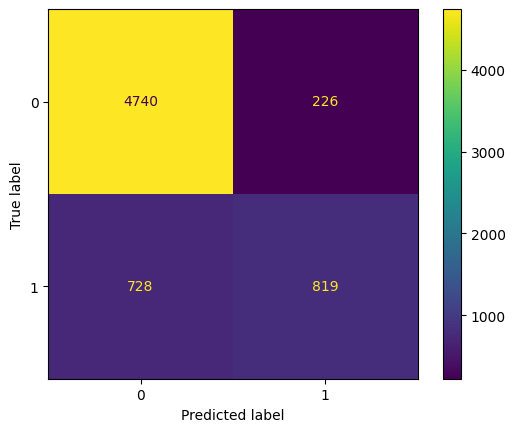

In [ ]:
# Com GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# hiperparâmetros a serem ajustados
param_grid = {
 'max_depth': [3, 5, 7, 12],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4, 8],
 'criterion': ['gini', 'entropy']
}

# Cria o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Ajusta os hiperparâmetros
grid_search.fit(X_train, y_train)

# Imprimi os melhores hiperparâmetros
params = grid_search.best_params_
print(params)

params_converted = {
   'max_depth': int(params['max_depth']),
   'min_samples_split': int(params['min_samples_split']),
   'min_samples_leaf': int(params['min_samples_leaf']),
   'criterion': params['criterion']
}

clf = tree.DecisionTreeClassifier(**params_converted)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_score = clf.score(X_train, y_train)
clf_test = clf.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score', clf_score)
print('Testing Score \n', clf_test)

ConfusionMatrixDisplay(cm).plot()

{'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 7, 'criterion': 'gini'}
Training Score 0.8546145577395577
Testing Score 
 0.8516812528788577


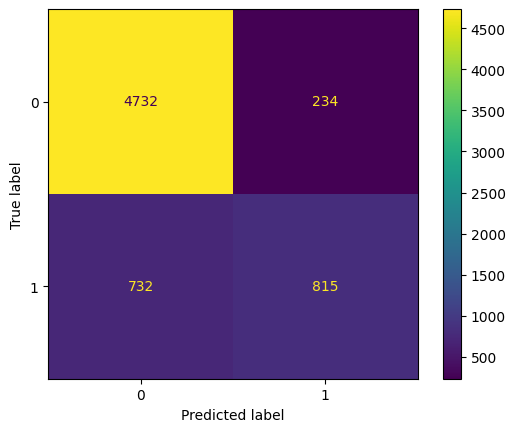

In [ ]:
# Com RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define os hiperparâmetros a serem ajustados
param_dist = {
 'max_depth': [3, 5, 7, 12],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4, 8],
 'criterion': ['gini', 'entropy']
}

# Cria o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Cria o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=5)

# Ajusta os hiperparâmetros
random_search.fit(X_train, y_train)

params = random_search.best_params_
# Imprimi os melhores hiperparâmetros
print(params)

# Converte os hiperparâmetros para os tipos de dados corretos
params_converted = {
   'max_depth': int(params['max_depth']),
   'min_samples_split': int(params['min_samples_split']),
   'min_samples_leaf': int(params['min_samples_leaf']),
   'criterion': params['criterion']
}

clf = tree.DecisionTreeClassifier(**params_converted)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

clf_score = clf.score(X_train, y_train)
clf_test = clf.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score', clf_score)
print('Testing Score \n', clf_test)

ConfusionMatrixDisplay(cm).plot()

## Amostragem por validação cruzada estratificada (10 folds)

In [ ]:
from sklearn.model_selection import StratifiedKFold
import statistics as sts
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(n_splits=10)
lst_accu_stratified = []
lst_accu_knn = []
lst_accu_clf = []

kf = MLPClassifier(activation='relu', solver='adam', max_iter=800, tol=0.0001, random_state= 3)

for train_index, test_index in skf.split(X_train, y_train):
   x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
   y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

   kf.fit(x_train_fold, y_train_fold)
   knn.fit(x_train_fold, y_train_fold)
   clf.fit(x_train_fold, y_train_fold)

   lst_accu_stratified.append(kf.score(x_test_fold, y_test_fold))
   lst_accu_knn.append(knn.score(x_test_fold, y_test_fold))
   lst_accu_clf.append(clf.score(x_test_fold, y_test_fold))

# Print the output train.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:', max(lst_accu_stratified)*100,'%')
print('\nMenor ACC:', min(lst_accu_stratified)*100,'%')
print('\nMédia ACC:', sts.mean(lst_accu_stratified)*100,'%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

print('Lista de ACC KNN:', lst_accu_knn)
print('\nMaior ACC KNN:', max(lst_accu_knn)*100, '%')
print('\nMenor ACC KNN:', min(lst_accu_knn)*100, '%')
print('\nMédia ACC KNN:', sts.mean(lst_accu_knn)*100, '%')
print('\nDesvio Padrão KNN:', sts.stdev(lst_accu_knn))

print('Lista de ACC Decision Tree:', lst_accu_clf)
print('\nMaior ACC Decision Tree:', max(lst_accu_clf)*100, '%')
print('\nMenor ACC Decision Tree:', min(lst_accu_clf)*100, '%')
print('\nMédia ACC Decision Tree:', sts.mean(lst_accu_clf)*100, '%')
print('\nDesvio Padrão Decision Tree:', sts.stdev(lst_accu_clf))

Lista de ACC: [0.8314779270633398, 0.8257197696737044, 0.8272552783109405, 0.8418426103646833, 0.8383877159309021, 0.8326295585412667, 0.8226487523992323, 0.8326295585412667, 0.8341013824884793, 0.8352534562211982]

Maior ACC: 84.18426103646833 %

Menor ACC: 82.26487523992323 %

Média ACC: 83.21946009535013 %

Desvio Padrão: 0.005800064565289595
Lista de ACC KNN: [0.8261036468330134, 0.819961612284069, 0.8122840690978886, 0.8165067178502879, 0.8191938579654511, 0.8287907869481765, 0.8149712092130518, 0.8203454894433782, 0.8221966205837173, 0.8233486943164362]

Maior ACC KNN: 82.87907869481765 %

Menor ACC KNN: 81.22840690978886 %

Média ACC KNN: 82.0370270453547 %

Desvio Padrão KNN: 0.005022155154369767
Lista de ACC Decision Tree: [0.8487523992322457, 0.8522072936660269, 0.8537428023032629, 0.8602687140115163, 0.8560460652591171, 0.8591170825335892, 0.8456813819577735, 0.8437619961612284, 0.8575268817204301, 0.8556067588325653]

Maior ACC Decision Tree: 86.02687140115162 %

Menor ACC 

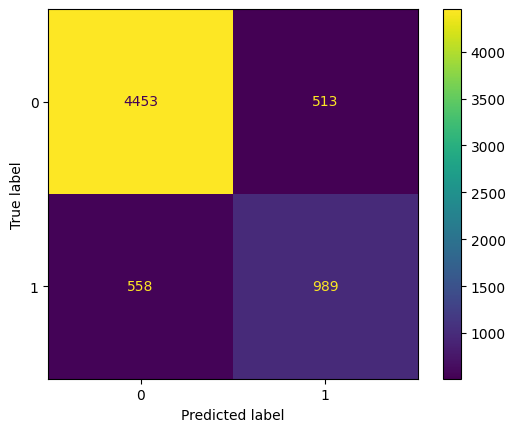

In [ ]:
y_pred = kf.predict(X_test)
X_test.shape
accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## K-MEANS COM ATRIBUTOS 'AGE' E 'EDUCATION'

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_scaled[['age','education']])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

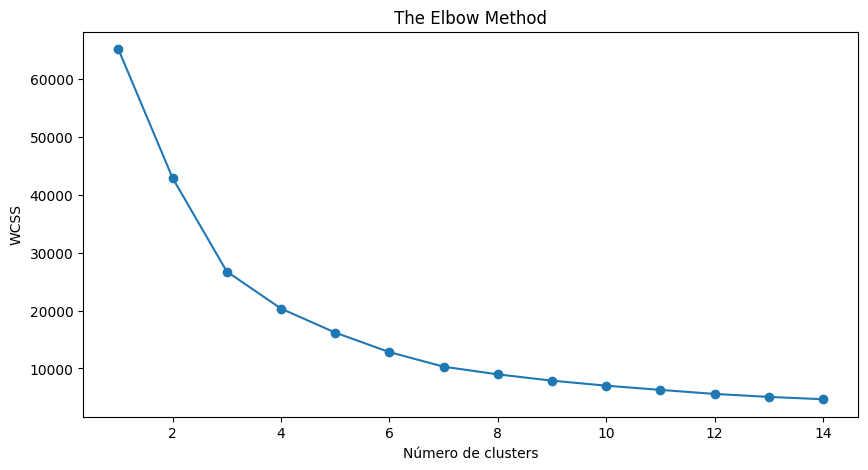

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [ ]:
kmeans1 = kmeans.fit(df_scaled[['age','education']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[ 0.06590378,  8.1474788 ],
       [-0.16054651, 14.92238427],
       [-0.20572758,  1.27449047],
       [ 0.10268122, 11.108603  ]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([3, 3, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.scatter(x = df_scaled['age'], y = df_scaled['education'], color=classificacao)
grafico.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
graf1 = px.scatter(x = df_scaled['age'], y = df_scaled['education'], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.show()

In [ ]:
# Adiciona a coluna cluster
df['cluster'] = kmeans1.labels_
df.head()

,age,fnlwgt,education,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,cluster
0,90,77053,11,0,0,4356,40,0,0,0,...,0,0,0,0,0,0,1,0,0,3
1,82,132870,11,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,66,186061,15,0,0,4356,40,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,54,140359,5,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,15,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,1,0,0,1


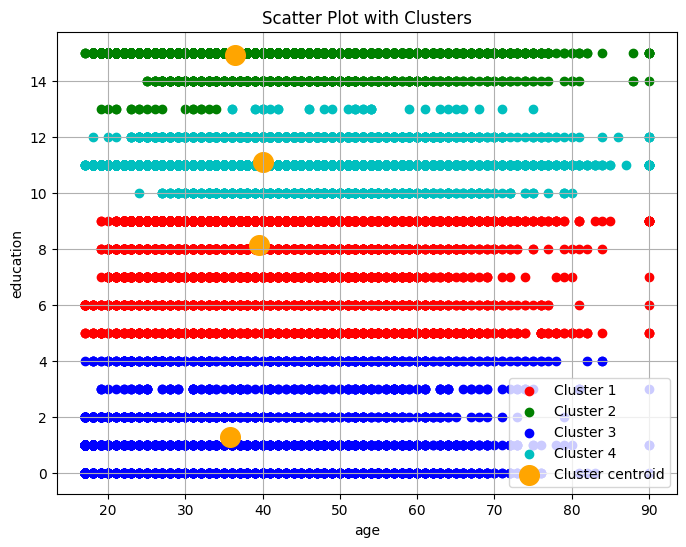

In [ ]:
colors = ['r', 'g', 'b', 'c']


# Create the scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['age'], cluster_data['education'], c=colors[i], label=f'Cluster {i+1}')
    if i == 3:  # Add the centroid legend entry only for the first cluster
        plt.scatter(cluster_data['age'].mean(), cluster_data['education'].mean(), s=200, c='orange', marker='o', label='Cluster centroid')
    else:
        plt.scatter(cluster_data['age'].mean(), cluster_data['education'].mean(), s=200, c='orange', marker='o')

plt.xlabel('age')
plt.ylabel('education')
plt.title('Scatter Plot with Clusters')
plt.legend()
plt.grid(True)
plt.show()